In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash  
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline            

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/wine.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


<Axes: >

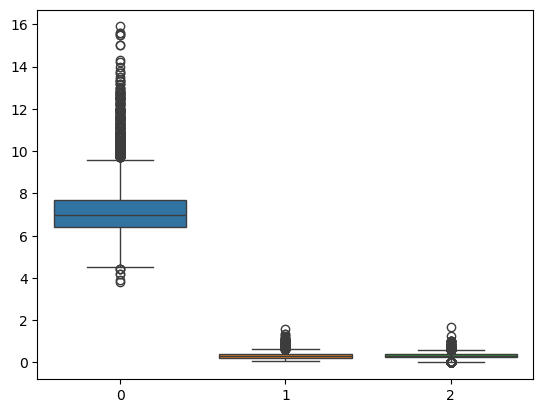

In [4]:
sns.boxplot(data.iloc[:,0:3])

In [5]:
data[12].value_counts()

12
0    4898
1    1599
Name: count, dtype: int64

In [6]:
X = data.drop(12, axis=1)
y = data[12]

In [7]:
from sklearn.preprocessing import RobustScaler

In [8]:
rs = RobustScaler()
X_scaled = rs.fit_transform(X)
X_scaled

array([[ 0.30769231,  2.41176471, -2.21428571, ...,  0.29411765,
        -0.5       , -1.        ],
       [ 0.61538462,  3.47058824, -2.21428571, ...,  1.        ,
        -0.27777778, -1.        ],
       [ 0.61538462,  2.76470588, -1.92857143, ...,  0.82352941,
        -0.27777778, -1.        ],
       ...,
       [-0.38461538, -0.29411765, -0.85714286, ..., -0.29411765,
        -0.5       ,  0.        ],
       [-1.15384615,  0.        , -0.07142857, ..., -0.76470588,
         1.38888889,  1.        ],
       [-0.76923077, -0.47058824,  0.5       , ..., -1.11764706,
         0.83333333,  0.        ]])

In [9]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, stratify=y, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

In [12]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import classification_report

2024-09-10 15:03:37.212035: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 15:03:38.938867: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-09-10 15:03:38.939010: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-09-10 15:03:38.942479: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-09-10 15:03:39.384626: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


In [13]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


2024-09-10 15:03:39.686136: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 15:03:39.687457: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) Graphics)
2024-09-10 15:03:39.763050: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 15:03:39.763099: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-10 15:03:39.763122: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=500, validation_data=(X_valid, y_valid))

Epoch 1/100


2024-09-10 15:03:40.448277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 15:03:40.510835: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 15:03:40.510896: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


8/8 [==============================] - 1s 72ms/step - loss: 0.6248 - accuracy: 0.6475 - val_loss: 0.5752 - val_accuracy: 0.7552
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.5312 - accuracy: 0.8158 - val_loss: 0.4911 - val_accuracy: 0.8737
Epoch 3/100
1/8 [==>...........................] - ETA: 0s - loss: 0.4957 - accuracy: 0.8500

2024-09-10 15:03:41.297139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 15:03:41.322131: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 15:03:41.322195: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


8/8 [==============================] - 0s 16ms/step - loss: 0.4511 - accuracy: 0.8971 - val_loss: 0.4178 - val_accuracy: 0.9199
Epoch 4/100
8/8 [==============================] - 0s 15ms/step - loss: 0.3805 - accuracy: 0.9371 - val_loss: 0.3521 - val_accuracy: 0.9446
Epoch 5/100
8/8 [==============================] - 0s 14ms/step - loss: 0.3177 - accuracy: 0.9561 - val_loss: 0.2937 - val_accuracy: 0.9630
Epoch 6/100
8/8 [==============================] - 0s 15ms/step - loss: 0.2627 - accuracy: 0.9656 - val_loss: 0.2430 - val_accuracy: 0.9669
Epoch 7/100
8/8 [==============================] - 0s 14ms/step - loss: 0.2160 - accuracy: 0.9718 - val_loss: 0.2006 - val_accuracy: 0.9746
Epoch 8/100
8/8 [==============================] - 0s 15ms/step - loss: 0.1775 - accuracy: 0.9767 - val_loss: 0.1662 - val_accuracy: 0.9784
Epoch 9/100
8/8 [==============================] - 0s 15ms/step - loss: 0.1463 - accuracy: 0.9795 - val_loss: 0.1391 - val_accuracy: 0.9792
Epoch 10/100
8/8 [==============

8/8 [==============================] - 0s 15ms/step - loss: 0.0167 - accuracy: 0.9962 - val_loss: 0.0346 - val_accuracy: 0.9954
Epoch 62/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0164 - accuracy: 0.9964 - val_loss: 0.0347 - val_accuracy: 0.9946
Epoch 63/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0162 - accuracy: 0.9964 - val_loss: 0.0347 - val_accuracy: 0.9946
Epoch 64/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0160 - accuracy: 0.9964 - val_loss: 0.0346 - val_accuracy: 0.9946
Epoch 65/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0158 - accuracy: 0.9964 - val_loss: 0.0346 - val_accuracy: 0.9946
Epoch 66/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0157 - accuracy: 0.9964 - val_loss: 0.0346 - val_accuracy: 0.9946
Epoch 67/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0155 - accuracy: 0.9964 - val_loss: 0.0345 - val_accuracy: 0.9946
Epoch 68/100
8/8 [========

In [15]:
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test, pred))

41/41 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.98      0.99       320

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



2024-09-10 15:03:53.228994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 15:03:53.366864: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 15:03:53.366922: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-10 15:03:53.384041: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 15:03:53.384102: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

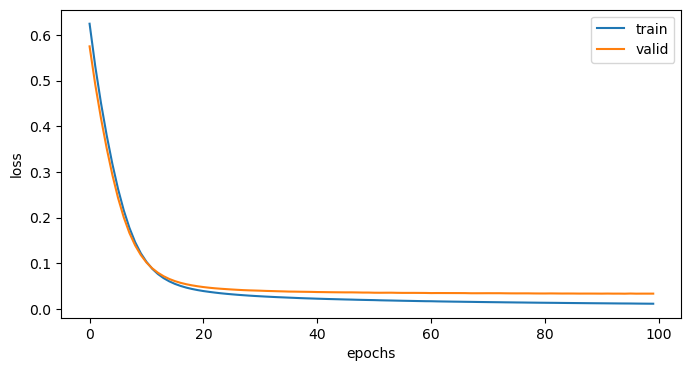

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'valid'])
plt.show()

# EarlyStopping으로 학습 조기 중단 및 저장하기

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [19]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)

# ModelCheckpoint
* 모델을 중간에 저장하는 옵션

In [20]:
import os
if not os.path.exists("./model"):
    os.makedirs("./model")
    print(f"Directory /model created.")
else:
    print(f"Directory /model already exists.")

Directory /model already exists.


In [21]:
modelpath = "./model/{epoch:03d}--{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [22]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=500, validation_data=(X_valid, y_valid), 
                   callbacks=[early_stopping_callback, checkpointer])

Epoch 1/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0112 - accuracy: 0.9979 - val_loss: 0.0333 - val_accuracy: 0.9954
Epoch 2/1000
8/8 [==============================] - 0s 22ms/step - loss: 0.0111 - accuracy: 0.9979 - val_loss: 0.0332 - val_accuracy: 0.9954
Epoch 3/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0110 - accuracy: 0.9979 - val_loss: 0.0333 - val_accuracy: 0.9954
Epoch 4/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0109 - accuracy: 0.9979 - val_loss: 0.0333 - val_accuracy: 0.9954
Epoch 5/1000
8/8 [==============================] - 0s 21ms/step - loss: 0.0108 - accuracy: 0.9979 - val_loss: 0.0331 - val_accuracy: 0.9954
Epoch 6/1000
8/8 [==============================] - 0s 22ms/step - loss: 0.0107 - accuracy: 0.9979 - val_loss: 0.0330 - val_accuracy: 0.9954
Epoch 7/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0106 - accuracy: 0.9979 - val_loss: 0.0331 - val_accuracy: 0.9954
Epoch 8/1000


Epoch 59/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0071 - accuracy: 0.9987 - val_loss: 0.0329 - val_accuracy: 0.9962
Epoch 60/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0071 - accuracy: 0.9987 - val_loss: 0.0326 - val_accuracy: 0.9962
Epoch 61/1000
8/8 [==============================] - 0s 21ms/step - loss: 0.0071 - accuracy: 0.9987 - val_loss: 0.0325 - val_accuracy: 0.9962
Epoch 62/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.0328 - val_accuracy: 0.9962
Epoch 63/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0069 - accuracy: 0.9987 - val_loss: 0.0328 - val_accuracy: 0.9962
Epoch 64/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0069 - accuracy: 0.9987 - val_loss: 0.0326 - val_accuracy: 0.9962
Epoch 65/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0069 - accuracy: 0.9987 - val_loss: 0.0328 - val_accuracy: 0.9962
Epoch 

8/8 [==============================] - 0s 15ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0339 - val_accuracy: 0.9962


# 저장된 베스트 모델을 불러와서 테스트 하기

In [23]:
from tensorflow.keras.models import load_model

In [24]:
best_model = load_model("./model/001--0.0356.keras")  # .h5

OSError: No file or directory found at ./model/001--0.0356.keras

In [ ]:
best_pred = best_model.predict(X_test)
best_pred = pd.DataFrame(best_pred)
best_pred = best_pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test, best_pred))

=============================================================================================================

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
wine = pd.read_csv("../06machine_learning/data/winequality-white.csv", sep=";")
wine.head()

In [ ]:
wine['quality'].value_counts()

In [ ]:
wine['quality'].nunique()

In [ ]:
wine.info()

In [ ]:
sns.boxplot(wine.iloc[:,2:3])

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
X = wine.drop('quality', axis=1).copy()
y = wine['quality'].copy()
y2 = wine['quality'].copy()

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
rbs = RobustScaler()
X_scaled = rbs.fit_transform(X)


In [ ]:
y = pd.get_dummies(y)
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, stratify=y, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

In [ ]:
print(X_train.shape, X_valid.shape, X_test.shape)

In [ ]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience=200) 
filepath = "./model/white_wine{epoch:04d}__{val_loss:.4f}.keras"
model_save = ModelCheckpoint(filepath=filepath, save_best_only=True)
history = model.fit(X_train, y_train, epochs=10000, batch_size=500, validation_data=(X_valid, y_valid),
                   callbacks=[early_stop, model_save])

In [ ]:
wine_best_model = load_model("./model/white_wine0080__1.0441.keras")
wine_pred = wine_best_model.predict(X_test)
wine_pred = pd.DataFrame(wine_pred, columns=y.columns)

In [ ]:
wine_pred

In [ ]:
y_test_class = y_test.idxmax(axis=1)
y_test_class = y_test_class.reset_index(drop=True)
y_test_class

In [ ]:
wine_pred_class = wine_pred.idxmax(axis=1)
wine_pred_class

In [ ]:
y.value_counts()

In [ ]:
print(classification_report(y_test_class, wine_pred_class))

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y2_labeled = le.fit_transform(y2)
y2_labeled

XGB로 비교분석

In [ ]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_scaled, y2_labeled, test_size=0.4, stratify=y2_labeled, random_state=10)
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_valid2, y_valid2, test_size=0.5, stratify=y_valid2, random_state=10)

In [ ]:
# !pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(max_depth= 5, n_estimators=1000, random_state=10, n_jobs=-1)
xgb.fit(X_train2, y_train2)
xgb_pred = xgb.predict(X_valid2)
print(classification_report(le.inverse_transform(y_valid2), le.inverse_transform(xgb_pred)))

In [ ]:
wine.info()

In [ ]:
X = wine.drop('quality', axis=1).copy()
y = wine['quality'].copy()
y2 = wine['quality'].copy()

In [ ]:
y = pd.get_dummies(y)

In [ ]:
y

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rs = RobustScaler()
X_scaled = rs.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, stratify=y ,random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

In [ ]:
X_train.dtype

In [ ]:
print(X_train.shape, X_valid.shape, X_test.shape)

In [ ]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report

In [ ]:
model1 = Sequential()
model1.add(Dense(64, input_dim=11, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(7, activation='softmax'))

In [ ]:
model1.summary()

In [ ]:
print(X_train.shape, y_train.shape)

In [ ]:
model1.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=1000)
modelpath = "./model/wine_model{epoch:0003d}__{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
history = model1.fit(X_train, y_train, epochs=10000, batch_size=500, validation_data=(X_valid, y_valid), callbacks=[early_stop, checkpointer])

In [ ]:
wine_best_model = load_model("./model/wine_model019__1.0356.keras")
pred = wine_best_model.predict(X_test)
pred = pd.DataFrame(pred)
pred


In [ ]:
# 각 행에서 확률이 가장 높은 클래스의 인덱스를 찾기
predicted_classes = pred.idxmax(axis=1)

# 결과 출력
print(predicted_classes)

In [ ]:
# 각 행에서 확률이 가장 높은 클래스의 인덱스를 찾기
y_classes = y_test.idxmax(axis=1)

# 결과 출력
print(y_classes)

In [ ]:
y_test

In [ ]:
print(classification_report(y_classes, predicted_classes))

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y_labeled = le.fit_transform(y2)
y_labeled

In [ ]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_scaled, y_labeled, test_size=0.4, stratify=y_labeled ,random_state=10)
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_valid2, y_valid2, test_size=0.5, stratify=y_valid2, random_state=10)

In [ ]:
# !pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(max_depth=5, n_estimators=1000, n_jobs=-1, random_state=10)
xgb.fit(X_train2, y_train2)
xgb_pred = xgb.predict(X_valid2)
print(classification_report(le.inverse_transform(y_test2), le.inverse_transform(xgb_pred)))